In [104]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD
import os
import tarfile
from torch.utils.data import Dataset, DataLoader

# Import same MNIST dataset to run evaluations on locally

Download MNIST Dataset here: www.di.ens.fr/~lelarge/MNIST.tar.gz

In [105]:
with tarfile.open("MNIST.tar.gz") as tar:
    tar.extractall("MNIST_data")


Load MNIST Data into tensors for later use

In [106]:
x, y = torch.load("MNIST_data/MNIST/processed/training.pt")

# Dataset Object

In [107]:
class CTDataset(Dataset):
  def __init__(self, filepath):
    self.x, self.y = torch.load(filepath)
    self.x = self.x / 255 #Divide by 255 to normalize pixel values to the range of [0, 1]
    self.y = F.one_hot(self.y, num_classes=10).to(float)
  def __len__(self):
    return self.x.shape[0]  #returns num of images
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]

# Neural Net
This is the neural net we trained. When we import the weights trained from our model earlier, it will load the correct weights into this neural net, and when we do a forward pass
It will run it through the tweaked neural net and give us the correct outputs.

In [108]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1 = nn.Linear(28**2, 100)  # nn.Linear makes a link of nodes with param 1 being input size (our image sizes)
    self.Matrix2 = nn.Linear(100, 50)         # and the second param being output size
    self.Matrix3 = nn.Linear(50, 10)
    self.R = nn.ReLU()    # ReLU is a function that introduces non-linearity, since a forward pass is just a linear transformation
  def forward(self, x):
    x = x.view(-1, 28**2)   #Get x into correct format for the pass
    x = self.R(self.Matrix1(x))   # Introduce non-linearity at each layer and pass through all columns of neurons
    x = self.R(self.Matrix2(x))
    x = self.Matrix3(x)
    return x.squeeze()  #Remove single dimensions


# We need to format the input data

In [ ]:
test_ds = CTDataset("MNIST_data/MNIST/processed/test.pt")
x_test, y_test = test_ds[:]

In [114]:
f = MyNeuralNet()
f.load_state_dict(torch.load("model.pth"))
yhats_test = f(x_test).argmax(axis=1)

# Get our data ready to evaluate

In [115]:
#pass one image through
yhat_test = f(x_test[0]).argmax()
print(f"Predicted: {yhat_test}, actual: {y_test[0]}")

Predicted: 7, actual: tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=torch.float64)


Now pass all through and plot
left off here. find out how to pass the entire array of images.

ValueError: num must be 1 <= num <= 40, not 41

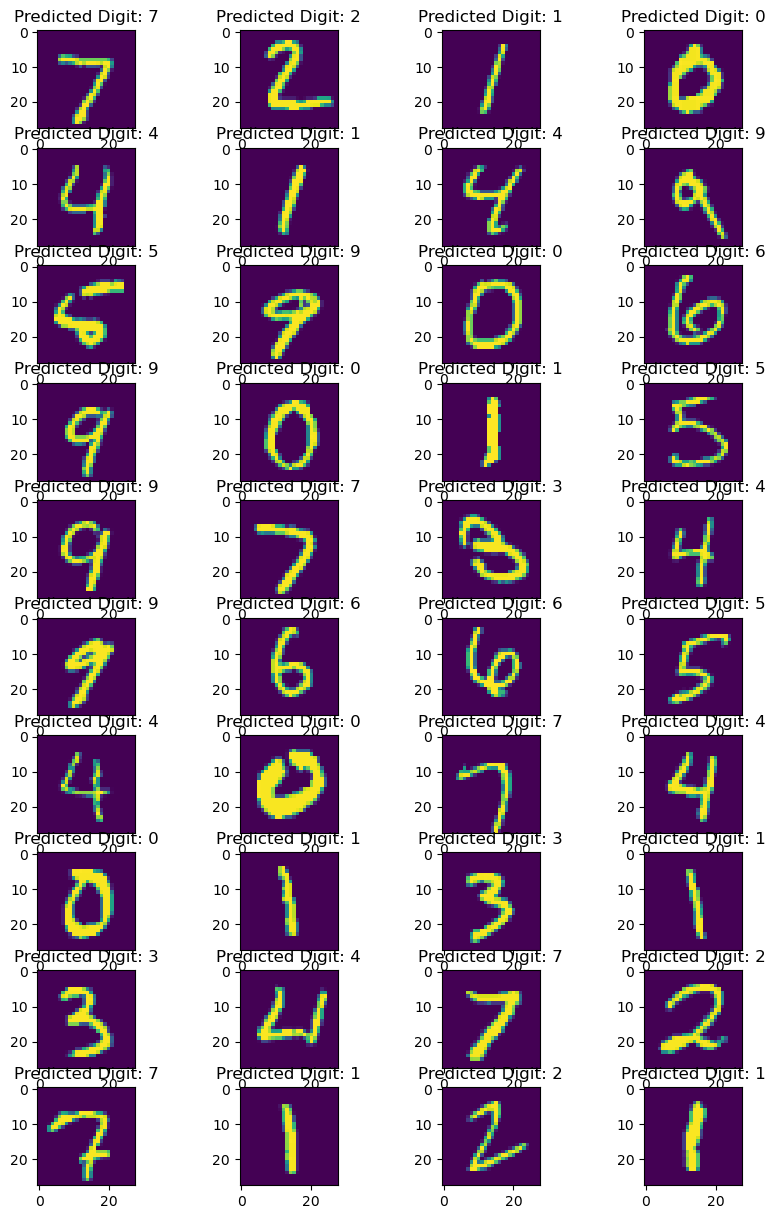

In [ ]:
fig, ax = plt.subplots(10, 4, figsize=(10, 15))
for i in range(40):
  plt.subplot(10, 4, i+1)
  plt.imshow(x_test[i])
  plt.title(f"Predicted Digit: {yhats_test[i]}")
fig.tight_layout()
plt.show()